#  CIFAR CNN

<font color="red">Train your best CNN model on the CIFAR dataset. Perform Champion vs Challenger bake off !
</font>

<img src="https://karpathy.github.io/assets/cifar_preview.png"/>

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.utils import to_categorical
import numpy as np

2023-05-05 12:37:14.208696: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 12:37:14.343291: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-05 12:37:14.891264: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-05 12:37:14.891307: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

### Load Dataset

In [2]:
num_classes = 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print (x_train.shape, y_train.shape)

x_train  /= 255
x_test /= 255

print (x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 10)
(50000, 32, 32, 3) (50000, 10)


### Sample Dataset

CIFAR Data Size : (10000, 32, 32, 3)


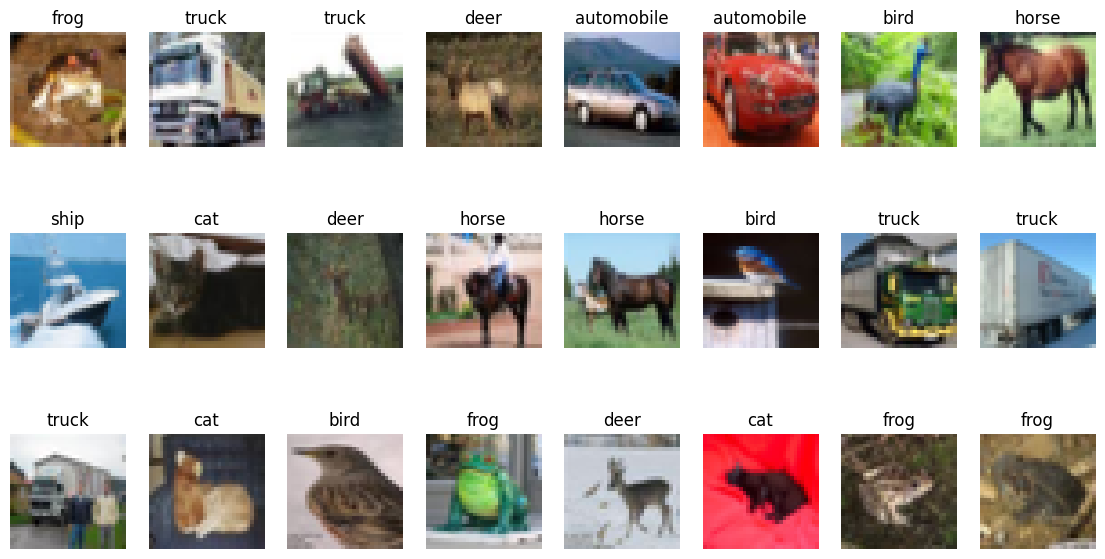

In [3]:
print ("CIFAR Data Size :" , x_test.shape)
plt.rcParams['figure.figsize'] = (8,8)

# Display the first few  training images
images_and_labels = list(zip(x_train, y_train))
plt.figure(figsize=(14,10))
for index, (image, label) in enumerate(images_and_labels[:24]):
    plt.subplot(4, 8, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    index = np.where(label == 1)
    plt.title(class_names[index[0][0]])
plt.show()

### Data Augmentation Layers

*Data augmentation is inactive at test time so input images will only be augmented during calls to Model.fit (not Model.evaluate or Model.predict).*

https://www.tensorflow.org/tutorials/images/data_augmentation

In [5]:
IMG_SIZE = 32

#resize and resale 
resize_and_rescale = Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

#data augmentation
data_augmentation = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

### Define Models

In [6]:
def base_model_1():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
   
    return model

In [7]:
def base_model_2():
    model = Sequential()

    return model

In [8]:
model = base_model_1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)            

In [17]:
# Train model
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = "categorical_crossentropy")

### Train Model

In [18]:
# Fit model
epochs = 80
batch_size=32

In [19]:
# fits the model on batches with real-time data augmentation:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/80


2023-05-05 12:49:49.111235: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 5s 3ms/step - loss: 1.1791 - val_loss: 1.2827
Epoch 2/80
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0772 - val_loss: 1.0407
Epoch 3/80
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0045 - val_loss: 1.0445
Epoch 4/80
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9545 - val_loss: 0.9600
Epoch 5/80
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8949 - val_loss: 0.9685
Epoch 6/80
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8624 - val_loss: 0.9331
Epoch 7/80
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8230 - val_loss: 0.9217
Epoch 8/80
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7943 - val_loss: 0.9326
Epoch 9/80
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7570 - val_loss: 0.9464
Epoch 10/80
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7338 - val_los

KeyboardInterrupt: 

### Persist Model

In [ ]:
#save model to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 

### Test Model

In [ ]:
#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('Test result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

In [ ]:
history.history.keys()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize Accuracy Vs Loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy vs Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
# Display the first few images
images_and_labels = list(zip(x_test, y_test))
plt.figure(figsize=(14,10))
for index, (image, label) in enumerate(images_and_labels[:24]):
    plt.subplot(4, 8, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    index = np.where(label == 1)
    imagedata = image[np.newaxis, :, :]
    pred = model.predict(imagedata)
    pred= pred[0].argmax(axis=0)
    plt.title(class_names[pred] +  " / " + class_names[index[0][0]])
plt.show()